<a href="https://colab.research.google.com/github/MarcosSilva2021/PythonColab/blob/main/exer2_NP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anotações :
https://colab.research.google.com/drive/1dfMlKQrHVi9ialw3AWfhig_A8z1qRA1U#scrollTo=L4yQdiJDWAEv

Análises
-    Qual cliente comprou mais em valor ?
-    Qual o produto mais vendido ?
-    Qual produto foi mais devolvido ?
-    Agrupe os produtos por marca e some a quantidade vendida


# Passos para analisar um arquivo csv

##passos :

1. import pandas as pd

df = pd.read_csv('caminho/para/seu/arquivo.csv')

2. Visualizar as primeiras e últimas linhas da tabela

Utilizar os métodos head() e tail() para dar uma olhada rápida nos dados e garantir que o arquivo foi carregado corretamente.

Visualiza as 5 primeiras linhas do DataFrame
print(df.head())

Visualiza as 5 últimas linhas do DataFrame
print(df.tail())

3. Obter informações gerais sobre a tabela

Use o método info() para verificar o tipo de dados de cada coluna, o número de entradas (linhas), e se há valores ausentes.

df.info()

Isso mostra:

    O número total de entradas (linhas).
    O nome das colunas.
    O tipo de dados de cada coluna.
    A quantidade de valores não nulos (útil para detectar valores ausentes).

4. Analisar estatísticas descritivas

Para obter uma visão geral das variáveis numéricas, use describe(). Ele fornece estatísticas como média, mediana, desvio padrão, mínimo, máximo, etc.

 df.describe()

5. Verificar valores ausentes

A verificação de valores ausentes é crucial para determinar se você precisa lidar com dados faltantes (excluir, preencher, etc.).

 Verifica valores ausentes por coluna
df.isnull().sum()

6. Verificar a duplicação de dados

Verifique se há linhas duplicadas no DataFrame, o que pode afetar a análise.

 Verifica se há linhas duplicadas
df.duplicated().sum()

7. Analisar a distribuição dos dados (opcional)

Para explorar a distribuição de dados de colunas numéricas, você pode usar métodos como hist() ou plot().

df['coluna_numerica'].hist()  # Histogramas para colunas numéricas

Ou até mesmo criar gráficos mais elaborados com a biblioteca matplotlib ou seaborn.
8. Analisar correlações (para variáveis numéricas)

Se você estiver lidando com dados numéricos, pode ser interessante verificar a correlação entre as variáveis para identificar possíveis relações.

df.corr()

Você também pode visualizar isso com um mapa de calor (usando seaborn):

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

9. Exploração e manipulação de dados

Nesta etapa, você pode realizar transformações e limpezas de dados mais avançadas, como:

    Filtrar ou selecionar dados com base em condições específicas.
    Agrupar dados usando groupby() para análises agregadas.
    Criar novas colunas ou modificar as existentes.

Exemplo de agrupamento:

df.groupby('coluna_categorica')['coluna_numerica'].mean()

10. Verificar e tratar outliers (opcional)

Outliers (valores discrepantes) podem ser identificados usando gráficos como boxplots, ou com a ajuda de métodos como IQR (Intervalo Interquartílico).

sns.boxplot(x=df['coluna_numerica'])

11. Limpeza de dados (se necessário)

Dependendo dos resultados das etapas anteriores, você pode precisar limpar seus dados, removendo valores ausentes, corrigindo valores errados, ou transformando variáveis.

 Exemplo de remoção de valores ausentes
df.dropna(inplace=True)

 Ou preenchendo valores ausentes
df['coluna'].fillna(valor, inplace=True)

12. Salvando os dados

Salvar os dados novamente em um novo arquivo para futuras análises.

df.to_csv('caminho/para/novo_arquivo.csv', index=False)

#Prática

## Importando as bibliotecas e as tabelas em csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
vendas = pd.read_csv("Vendas - 2017.csv", encoding="latin", sep=";")
produtos = pd.read_csv("Produtos.csv", encoding="latin", sep=";")
clientes = pd.read_csv("Clientes.csv", encoding="latin", sep=";")


In [ ]:
vendas.head(1)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1


In [ ]:
produtos.head(2)

,ÿNome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22


In [ ]:
clientes.head(2)

,ÿID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN


#Converter dados - 1 passo

## Preparando a tabela clientes

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39504 entries, 0 to 39503
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID Cliente          39504 non-null  int64         
 1   Primeiro Nome       39504 non-null  object        
 2   Sobrenome           39504 non-null  object        
 3   E-mail              39504 non-null  object        
 4   Genero              39504 non-null  object        
 5   Numero de Filhos    39504 non-null  int64         
 6   Data de Nascimento  39504 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.1+ MB


### renomeando a coluna ID clientes


In [ ]:
clientes = clientes.rename(columns={'ÿID Cliente' : 'ID Cliente'})

###remover colunas com valores nulos

In [ ]:
clientes = clientes.dropna(axis=1, how='all')

### Covertendo coluna para datatime

In [ ]:
clientes['Data de Nascimento'] = pd.to_datetime(clientes['Data de Nascimento'], format='%d/%m/%Y')

## Preparando a tabela vendas


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 74.8+ MB


## Preparando a tabela produtos

In [ ]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ÿNome do Produto      1690 non-null   object
 1   Descricao do Produto  1690 non-null   object
 2   Fabricante            1690 non-null   object
 3   Nome da Marca         1690 non-null   object
 4   Tipo                  1690 non-null   object
 5   Custo Unitario        1690 non-null   object
 6   Preco Unitario        1690 non-null   object
 7   ID Produto            1690 non-null   int64 
 8   ID Subcategoria       1690 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 119.0+ KB


In [ ]:
produtos = produtos.rename(columns={'ÿNome do Produto' : 'Nome do Produto'})

### sustituir , por .

In [ ]:
produtos['Custo Unitario'] = produtos['Custo Unitario'].str.replace(',','.', regex=False )

In [ ]:
produtos['Preco Unitario'] = produtos['Preco Unitario'].str.replace(',','.', regex=False )

### Convertendo para valores float

In [ ]:
produtos['Custo Unitario'] = produtos['Custo Unitario'].astype(float)

In [ ]:
produtos['Preco Unitario'] = produtos['Preco Unitario'].astype(float)

# Merge

In [ ]:
vendas_produtos = pd.merge(produtos, vendas, on="ID Produto")
vendas_produtos.head(2)

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,10.69,20.96,873,22,510768,07/07/2017,07/07/2017,0,166,3,25715,6,1
1,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,10.69,20.96,873,22,511118,07/07/2017,07/07/2017,0,199,3,22089,6,0


# Tratar dados Nulos - localizar

In [ ]:
vendas_produtos[vendas_produtos.isna()]

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vendas_produtos[~vendas_produtos.isna()]

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,10.69,20.96,873,22,510768,07/07/2017,07/07/2017,0,166,3,25715,6,1
1,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,10.69,20.96,873,22,511118,07/07/2017,07/07/2017,0,199,3,22089,6,0
2,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,10.69,20.96,873,22,512223,07/07/2017,14/07/2017,7,34,3,22634,6,0
3,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,10.69,20.96,873,22,512568,07/07/2017,07/07/2017,0,254,1,7647,6,0
4,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,10.69,20.96,873,22,512783,07/07/2017,07/07/2017,0,306,1,20683,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,SV DVD 12-Inch Player Portable M400 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,82.77,179.99,1612,35,976006,30/12/2017,02/01/2018,3,286,4,11848,13,0
980638,SV DVD 12-Inch Player Portable M400 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,82.77,179.99,1612,35,976651,30/12/2017,30/12/2017,0,230,10,29273,16,0
980639,SV DVD 12-Inch Player Portable M400 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,82.77,179.99,1612,35,976943,30/12/2017,01/01/2018,2,307,5,2739,26,2
980640,SV DVD 12-Inch Player Portable M400 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,82.77,179.99,1612,35,977600,30/12/2017,01/01/2018,2,247,10,16937,8,0


### retorna: True - valor nulo e False - Nâo nulo

In [ ]:

vendas_produtos.isnull()

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
980638,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
980639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
980640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## contar dados nulos na coluna

In [ ]:
vendas_produtos.isnull().sum()

,0
Nome do Produto,0
Descricao do Produto,0
Fabricante,0
Nome da Marca,0
Tipo,0
Custo Unitario,0
Preco Unitario,0
ID Produto,0
ID Subcategoria,0
Numero da Venda,0


## tratando dados nulos - substituir

- Remover Linhas com dados nulos

In [ ]:
df_sem_nulos = df.dropna()

- Remover Colunas com Dados Nulos

In [ ]:
df_sem_colunas_nulas = df.dropna(axis=1)

## Preencher valores nulos com um valor específico:

- Vamos preencher NaN na coluna Idade com 0.

In [ ]:
df['Idade'].fillna(0, inplace=True)

- Preencher valores nulos com o valor anterior (ffill):

In [ ]:
df['Salário'].fillna(method='ffill', inplace=True)

- Preencher valores nulos com o valor Posterior (bfill):

In [ ]:
df['Salário'].fillna(method='bfill', inplace=True)

- Substituir valores nulos com a média da coluna:

In [ ]:
df['Idade'].fillna(df['Idade'].mean(), inplace=True)

- substituir com Lambda

In [ ]:
def rep(x):
  return x.replace("RH","RL")
  # ambos so comandos funcionam
df['MSZoning'] = df['MSZoning'].apply(lambda x: x.replace("RH", "RL"))

df['MSZoning'] = df['MSZoning'].apply(lambda x: rep(x))

# Execução - Analises

- Qual cliente comprou mais em valor?
- Qual o produto mais vendido?
- Qual produto foi mais devolvido?
- Agrupe os produtos por marca e some a quantidade vendida

## Qual o produto mais vendido

In [ ]:
vendas.groupby("ID Produto").agg({"Quantidade Vendida": "sum"}).sort_values("Quantidade Vendida", ascending=False)

,Quantidade Vendida
ID Produto,
2492,114300
2488,113880
2490,113440
2517,113400
2489,113060
...,...
34,136
171,124
36,110


## Qual o produto menos vendido ?

In [ ]:
vendas.groupby("ID Produto").agg({"Quantidade Devolvida": "sum"}).sort_values("Quantidade Devolvida", ascending=False)

## Qual cliente comprou mais (qdade)

In [ ]:
vendas['ID Cliente'].value_counts()

,count
ID Cliente,
21485,56
16984,56
20009,56
12297,53
15919,53
...,...
540,1
253,1
638,1


## Qual cliente comprou mais (valor)

In [ ]:
vendas_produtos["total vendas"] = vendas_produtos['Preco Unitario'] * vendas_produtos['Quantidade Vendida']

In [ ]:
vendas_produtos.groupby("ID Cliente").agg({"total vendas": "sum"}).sort_values("total vendas", ascending=False )

,total vendas
ID Cliente,
12654,352221.94
26260,341564.01
28198,313240.81
29102,305609.90
23642,300124.07
...,...
79,41.70
163,39.96
50,39.96


## Agrupar produtos por marca e somar a qdade vendida

In [ ]:
vendas_produtos.groupby("Nome da Marca").agg({"Quantidade Vendida": "sum"}).sort_values("Quantidade Vendida", ascending=False)

,Quantidade Vendida
Nome da Marca,
Contoso,4853792
Proseware,1173515
Fabrikam,1110570
The Phone Company,1064954
A. Datum,1035036
Southridge Video,951703
Adventure Works,817579
Wide World Importers,633311
Litware,148132


## Faça uma agregação dos dados Pela a coluna Tipo, trazendo a média do preço unitário e a soma da coluna quantidade devolvida

In [ ]:
grup_tipo = vendas_produtos.groupby("Tipo").agg({"Preco Unitario": "mean", "Quantidade Devolvida": "sum"})
grup_tipo

,Preco Unitario,Quantidade Devolvida
Tipo,,
Econômico,110.244554,53175
Luxo,583.578379,15538
Regular,326.037983,70218


## Crie um gráfico de barras no dataframe grupo_tipo na coluna preço unitário,

<Axes: xlabel='Tipo'>

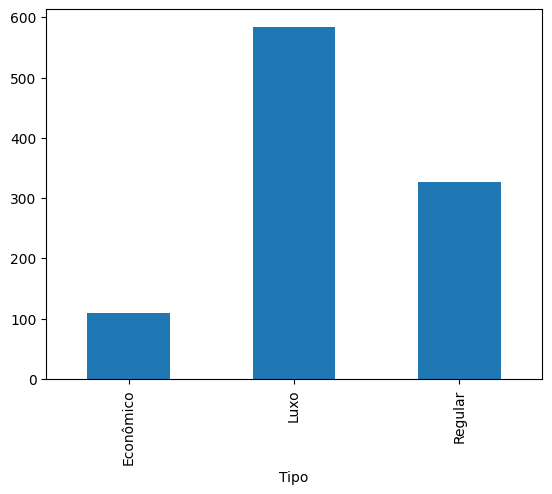

In [ ]:
grup_tipo['Preco Unitario'].plot(kind="bar")

## Criação de coluna que é a divisão da coluna quantidade devolvida / quantidade vendida * 100

In [ ]:
vendas_produtos["coef_dev"] = vendas_produtos['Quantidade Devolvida']/ vendas_produtos['Quantidade Vendida'] * 100

In [ ]:
vendas_produtos[["coef_dev"]]

,coef_dev
0,16.666667
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
980637,0.000000
980638,0.000000
980639,7.692308
980640,0.000000
